# Dengue Fever - Data Preparation Code

The Dengue Fever dataset can be found on the DrivenData Competition website:
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/

In [1]:
from numpy.random import randn
import numpy as np
import pandas as pd
np.random.seed(123)
import os
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

# 1-3: Data cleansing part, 4-6: Analysis part


# **Step 1: Data Collection**

There are 2 data sets that will be read into a Dataframe:
* dengue_features_train.csv
* dengue_labels_train.csv

In [2]:
# Reading data:
dengue_features_train = pd.read_table('dengue_features_train.csv', sep=',', header=0, delimiter=None, index_col=None, doublequote=True, engine='python')
dengue_features_train.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
dengue_labels_train = pd.read_table('dengue_labels_train.csv', sep=',', header=0, delimiter=None, index_col=None, doublequote=True, engine='python')
dengue_labels_train.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


# **Step 2: Cleaning Data**

Cleaning Data involves the following key steps:
* 2.a. Understand the data
* 2.b. Handling missing data
* 2.c. Transforming data into meaningful indicators and measures

## 2.a. Understanding the Data

After importing the data, examine the meta data of the data set. 

In [4]:
dengue_features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [5]:
#Summarizing the number of NaNs present in each column
dengue_features_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

**Observations:**
* Total of 1456 records in the data set
* 20 out of the 24 data columns have NaN values. **See Step 2.b. for approaches taken to handle missing data.**
* 'year', 'weekofyear', 'week_start_date' data type will need to be converted to the appropriate time series data type **See Step 2.c. for further details on changing the data type.**

In [6]:
dengue_labels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [7]:
#Summarizing the number of NaNs present in each column
dengue_labels_train.isnull().sum()

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

**Observations:**
* Total of 1456 records in the data set.
* No columns have NaN values.

The 'total_cases" data field needs to be joined to the "dengue_features_train" dataset in order to analyze the impacts of the features on the number of Dengue fever cases together.

**The following code was used the join the datasets:**

In [8]:
new_train_set = pd.merge(dengue_features_train,dengue_labels_train, how='left', left_on =['city','year','weekofyear'], right_on=['city','year','weekofyear'])

In [9]:
new_train_set.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


## 2.b. Handling Missing Data

In the Dengue dataset, 20 out of the 24 data columns contain missing data. Since the environmental attributes for each attribution would specific to the location, filling methods are applied given the City as this will prevent imputing one city's data into another. To do this, the dataset will be split into two different dataframe based on City.¶

In [10]:
df_sj = new_train_set[new_train_set["city"] == "sj"] #dataset for San Juan
df_iq = new_train_set[new_train_set["city"] == "iq"] #dataset for Iquitos

In [11]:
#Extract the column names from the Dataframe to populate into the code
df_sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

### 2.b.i. Filling in Missing Data for df_sj (San Juan Dataset)

In [12]:
# Replace nulls in df_sj

# replacing na values with previeus value  with limitation of 3 days 
df_sj['reanalysis_air_temp_k'].fillna(method='ffill',limit=3,inplace=True)
df_sj['reanalysis_tdtr_k'].fillna(method='ffill',limit=3,inplace=True)
df_sj['station_diur_temp_rng_c'].fillna(method='ffill',limit=4,inplace=True)
df_sj['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)


# replacing na values with average value
df_sj['reanalysis_avg_temp_k'].fillna(df_sj['reanalysis_avg_temp_k'].mean(),inplace=True)
df_sj['reanalysis_dew_point_temp_k'].fillna(df_sj['reanalysis_dew_point_temp_k'].mean(),inplace=True)
df_sj['reanalysis_max_air_temp_k'].fillna(df_sj['reanalysis_max_air_temp_k'].mean(),inplace=True)
df_sj['reanalysis_min_air_temp_k'].fillna(df_sj['reanalysis_min_air_temp_k'].mean(),inplace=True)
df_sj['reanalysis_precip_amt_kg_per_m2'].fillna(df_sj['reanalysis_precip_amt_kg_per_m2'].mean(),inplace=True)
df_sj['reanalysis_specific_humidity_g_per_kg'].fillna(df_sj['reanalysis_specific_humidity_g_per_kg'].mean(),inplace=True)
df_sj['station_avg_temp_c'].fillna(df_sj['station_avg_temp_c'].mean(),inplace=True)
df_sj['station_min_temp_c'].fillna(df_sj['station_min_temp_c'].mean(),inplace=True)
df_sj['station_max_temp_c'].fillna(df_sj['station_max_temp_c'].mean(),inplace=True)
df_sj['station_precip_mm'].fillna(df_sj['station_precip_mm'].mean(),inplace=True)
df_sj['precipitation_amt_mm'].fillna(df_sj['precipitation_amt_mm'].mean(),inplace=True)
df_sj['reanalysis_relative_humidity_percent'].fillna(df_sj['reanalysis_relative_humidity_percent'].mean(),inplace=True)


# fill nul values with the next value
df_sj['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)

C:\anaconda3\lib\site-packages\pandas\core\generic.py:6244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
# check if nulls are replaced
df_sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  9
ndvi_nw                                  9
ndvi_se                                  8
ndvi_sw                                  8
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             9
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

* There are still NaNs in the dataset. Since the number of NaN records remaining is immaterial, to fill in the remaining missing values, the mean of the respective columns will be used. This should not significantly skew the analysis.

In [14]:
cols_sj=['ndvi_ne','ndvi_nw', 'ndvi_se','ndvi_sw','reanalysis_sat_precip_amt_mm'] #identifying the columns that still have NaN values
df_sj[cols_sj]=df_sj[cols_sj].fillna(df_sj.mean())
df_sj.isnull().sum()

C:\anaconda3\lib\site-packages\pandas\core\frame.py:2960: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

### 2.b.ii. Filling in Missing Data for df_iq (Iquitos Dataset)

In [15]:
# Replace nulls in df_iq

# replacing na values with previeus value  with limitation of 3 days 
df_iq['reanalysis_air_temp_k'].fillna(method='ffill',limit=3,inplace=True)
df_iq['reanalysis_tdtr_k'].fillna(method='ffill',limit=3,inplace=True)
df_iq['station_diur_temp_rng_c'].fillna(method='ffill',limit=4,inplace=True)
df_iq['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)


# replacing na values with average value
df_iq['reanalysis_avg_temp_k'].fillna(df_iq['reanalysis_avg_temp_k'].mean(),inplace=True)
df_iq['reanalysis_dew_point_temp_k'].fillna(df_iq['reanalysis_dew_point_temp_k'].mean(),inplace=True)
df_iq['reanalysis_max_air_temp_k'].fillna(df_iq['reanalysis_max_air_temp_k'].mean(),inplace=True)
df_iq['reanalysis_min_air_temp_k'].fillna(df_iq['reanalysis_min_air_temp_k'].mean(),inplace=True)
df_iq['reanalysis_precip_amt_kg_per_m2'].fillna(df_iq['reanalysis_precip_amt_kg_per_m2'].mean(),inplace=True)
df_iq['reanalysis_specific_humidity_g_per_kg'].fillna(df_iq['reanalysis_specific_humidity_g_per_kg'].mean(),inplace=True)
df_iq['station_avg_temp_c'].fillna(df_iq['station_avg_temp_c'].mean(),inplace=True)
df_iq['station_min_temp_c'].fillna(df_iq['station_min_temp_c'].mean(),inplace=True)
df_iq['station_max_temp_c'].fillna(df_iq['station_max_temp_c'].mean(),inplace=True)
df_iq['station_precip_mm'].fillna(df_iq['station_precip_mm'].mean(),inplace=True)
df_iq['precipitation_amt_mm'].fillna(df_iq['precipitation_amt_mm'].mean(),inplace=True)
df_iq['reanalysis_relative_humidity_percent'].fillna(df_iq['reanalysis_relative_humidity_percent'].mean(),inplace=True)


# fill nul values with the next value
df_iq['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)

C:\anaconda3\lib\site-packages\pandas\core\generic.py:6244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
# check if nulls are replaced
df_iq.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             4
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  3
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

* There are still NaNs in the dataset. Since the number of NaN records remaining is immaterial, to fill in the remaining missing values, the mean of the respective columns will be used. This should not significantly skew the analysis.

In [17]:
cols_iq=['reanalysis_sat_precip_amt_mm','station_diur_temp_rng_c'] #identifying the columns that still have NaN values
df_iq[cols_iq]=df_iq[cols_iq].fillna(df_iq.mean())
df_iq.isnull().sum()

C:\anaconda3\lib\site-packages\pandas\core\frame.py:2960: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

## 2.c. Transforming Data
1. Converting time series data types
2. Create New Data Fields
    * a) Vegetation
    * b) City name mapping
     

### (1) Converting "week_start_date" to DateObject

In [18]:
#Convert week_start_date into a date object
df_sj['week_start_date']=pd.to_datetime(df_sj['week_start_date'])
df_iq['week_start_date']=pd.to_datetime(df_iq['week_start_date'])

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df_sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   936 non-null    object        
 1   year                                   936 non-null    int64         
 2   weekofyear                             936 non-null    int64         
 3   week_start_date                        936 non-null    datetime64[ns]
 4   ndvi_ne                                936 non-null    float64       
 5   ndvi_nw                                936 non-null    float64       
 6   ndvi_se                                936 non-null    float64       
 7   ndvi_sw                                936 non-null    float64       
 8   precipitation_amt_mm                   936 non-null    float64       
 9   reanalysis_air_temp_k                  936 non-null    float64   

In [20]:
df_iq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 936 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   520 non-null    object        
 1   year                                   520 non-null    int64         
 2   weekofyear                             520 non-null    int64         
 3   week_start_date                        520 non-null    datetime64[ns]
 4   ndvi_ne                                520 non-null    float64       
 5   ndvi_nw                                520 non-null    float64       
 6   ndvi_se                                520 non-null    float64       
 7   ndvi_sw                                520 non-null    float64       
 8   precipitation_amt_mm                   520 non-null    float64       
 9   reanalysis_air_temp_k                  520 non-null    float64

### (2) Creating New Data Fields

#### (2) a. Vegetation Type

The NDVI values individuate the type of vegetation in a given region:
1.	Water - Negative values approaching -1
2.	Barren areas of rock, sand, or snow - Values close to zero (-0.1 to 0.1)
3.	Shrub/Grassland - Low, positive values (approximately 0.2 to 0.4)
4.	Tropical Rainforest - High values (values approaching 1).

The above rules above was used to assign the vegation type to the NDVI values for 'ndvi_ne','ndvi_nw','ndvi_se' and 'ndvi_sw'.

In [21]:
#Step 1: Merge the data set back together
df_merge=pd.concat([df_sj,df_iq])
df_merge.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [22]:
#Assignment the df_merge type to the NDVI value
df_merge['veg_type_ne']=df_merge['ndvi_ne'].apply(lambda x:'water' if x<-0.1
                                              else 'barren' if (x<=0.1 and x>=-0.1)
                                              else 'grassland' if (x<=0.4 and x>0.1)
                                              else 'tropical' if (x<=1.0 and x>0.4)
                                              else 'unknown')
df_merge['veg_type_nw']=df_merge['ndvi_nw'].apply(lambda x:'water' if x<-0.1
                                              else 'barren' if (x<=0.1 and x>=-0.1)
                                              else 'grassland' if (x<=0.4 and x>0.1)
                                              else 'tropical' if (x<=1.0 and x>0.4)
                                              else 'unknown')
df_merge['veg_type_se']=df_merge['ndvi_se'].apply(lambda x:'water' if x<-0.1
                                              else 'barren' if (x<=0.1 and x>=-0.1)
                                              else 'grassland' if (x<=0.4 and x>0.1)
                                              else 'tropical' if (x<=1.0 and x>0.4)
                                              else 'unknown')
df_merge['veg_type_sw']=df_merge['ndvi_sw'].apply(lambda x:'water' if x<-0.1
                                              else 'barren' if (x<=0.1 and x>=-0.1)
                                              else 'grassland' if (x<=0.4 and x>0.1)
                                              else 'tropical' if (x<=1.0 and x>0.4)
                                              else 'unknown')
df_merge.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,veg_type_ne,veg_type_nw,veg_type_se,veg_type_sw
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,25.442857,6.900000,29.4,20.0,16.0,4,grassland,grassland,grassland,grassland
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,26.714286,6.371429,31.7,22.2,8.6,5,grassland,grassland,grassland,grassland
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.714286,6.485714,32.2,22.8,41.4,4,barren,grassland,grassland,grassland
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,27.471429,6.771429,33.3,23.3,4.0,3,grassland,grassland,grassland,grassland
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,28.942857,9.371429,35.0,23.9,5.8,6,grassland,grassland,grassland,grassland
5,sj,1990,23,1990-06-04,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,...,28.114286,6.942857,34.4,23.9,39.1,2,grassland,grassland,grassland,grassland
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,27.414286,6.771429,32.2,23.3,29.7,4,grassland,barren,grassland,grassland
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,28.371429,7.685714,33.9,22.8,21.1,5,barren,barren,grassland,grassland
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,28.328571,7.385714,33.9,22.8,21.1,10,grassland,grassland,grassland,grassland
9,sj,1990,27,1990-07-02,0.102450,0.121550,0.160683,0.202567,14.41,300.154286,...,28.328571,6.514286,33.9,24.4,1.1,6,grassland,grassland,grassland,grassland


#### (2).b City Name Mapping

In [26]:
city_map = {"sj":"San Juan", "iq": "Iquitos"}
df_merge["city"] = df_merge["city"].map(city_map)
df_merge.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,veg_type_ne,veg_type_nw,veg_type_se,veg_type_sw
0,San Juan,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,25.442857,6.900000,29.4,20.0,16.0,4,grassland,grassland,grassland,grassland
1,San Juan,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,26.714286,6.371429,31.7,22.2,8.6,5,grassland,grassland,grassland,grassland
2,San Juan,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.714286,6.485714,32.2,22.8,41.4,4,barren,grassland,grassland,grassland
3,San Juan,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,27.471429,6.771429,33.3,23.3,4.0,3,grassland,grassland,grassland,grassland
4,San Juan,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,28.942857,9.371429,35.0,23.9,5.8,6,grassland,grassland,grassland,grassland


# 3. Split data into two differnet dataframe based on city 

In [27]:
df_sj = df_merge[df_merge["city"] == "San Juan"]
df_iq = df_merge[df_merge["city"] == "Iquitos"]

df_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,veg_type_ne,veg_type_nw,veg_type_se,veg_type_sw
0,San Juan,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,25.442857,6.900000,29.4,20.0,16.0,4,grassland,grassland,grassland,grassland
1,San Juan,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,26.714286,6.371429,31.7,22.2,8.6,5,grassland,grassland,grassland,grassland
2,San Juan,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.714286,6.485714,32.2,22.8,41.4,4,barren,grassland,grassland,grassland
3,San Juan,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,27.471429,6.771429,33.3,23.3,4.0,3,grassland,grassland,grassland,grassland
4,San Juan,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,28.942857,9.371429,35.0,23.9,5.8,6,grassland,grassland,grassland,grassland


# 4. Plot cases for each week of year by city 
     (Overall analysis)

## 4.(1)  Total cases for week of year in San Juan

Text(0, 0.5, 'Number of Cases')

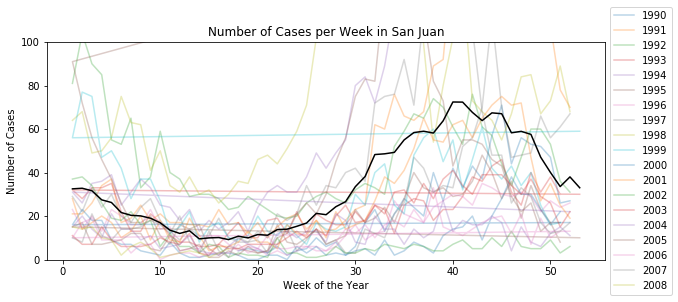

In [46]:
# plot cases for each week each year in san juan

for i in set(df_sj['year']):
    df = df_sj[df_sj['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
df_sj.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(df_sj['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in San Juan')
plt.ylim(0, 100)
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

In [32]:
df_sj.max()['total_cases']

461

In [34]:
max_val = df_sj[df_sj['total_cases'] == 461]
max_val

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,veg_type_ne,veg_type_nw,veg_type_se,veg_type_sw
232,San Juan,1994,41,1994-10-15,0.04585,0.076225,0.0955,0.192925,16.7,299.638571,...,28.328571,7.657143,35.0,23.9,39.2,461,barren,barren,barren,grassland


In [45]:
df_sj_rank=df_sj.sort_values('total_cases',ascending=False)
df_sj_rank

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,veg_type_ne,veg_type_nw,veg_type_se,veg_type_sw,total_case_rank
232,San Juan,1994,41,1994-10-15,0.045850,0.076225,0.095500,0.192925,16.70,299.638571,...,7.657143,35.0,23.9,39.2,461,barren,barren,barren,grassland,1.0
231,San Juan,1994,40,1994-10-08,0.045850,0.076225,0.095500,0.192925,0.63,300.377143,...,6.900000,34.4,24.4,8.2,426,barren,barren,barren,grassland,2.0
236,San Juan,1994,45,1994-11-12,0.057841,0.066448,0.176917,0.165805,32.26,299.297143,...,6.928571,31.7,22.2,54.5,410,barren,barren,grassland,grassland,3.0
230,San Juan,1994,39,1994-10-01,0.045850,0.076225,0.095500,0.192925,55.88,299.508571,...,6.700000,33.9,23.3,31.5,395,barren,barren,barren,grassland,4.0
233,San Juan,1994,42,1994-10-22,0.045850,0.076225,0.095500,0.192925,75.57,300.238571,...,7.442857,35.0,23.9,5.4,381,barren,barren,barren,grassland,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,San Juan,2000,13,2000-04-01,0.220400,0.146067,0.257950,0.211843,2.09,296.352857,...,7.142857,28.9,20.0,3.1,1,grassland,grassland,grassland,grassland,48.5
526,San Juan,2000,23,2000-06-10,0.145900,0.138175,0.168729,0.118843,46.02,299.624286,...,6.442857,31.7,23.3,4.8,0,grassland,grassland,grassland,grassland,51.0
522,San Juan,2000,19,2000-05-13,0.130200,0.098150,0.149086,0.134386,21.53,298.320000,...,6.914286,30.6,22.2,7.7,0,grassland,barren,grassland,grassland,51.0
523,San Juan,2000,20,2000-05-20,0.086500,0.087750,0.175283,0.160129,68.14,298.771429,...,7.128571,32.2,21.1,83.3,0,barren,barren,grassland,grassland,51.0


## 4.(2)  Total cases for week of year in Iquitos

Text(0, 0.5, 'Number of Cases')

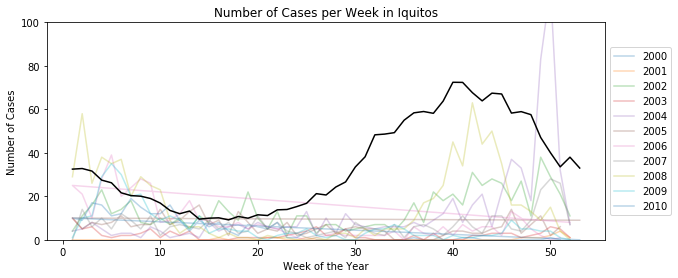

In [49]:

# plot cases for each week each year in Iquitos

for i in set(df_iq['year']):
    df = df_iq[df_iq['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
df_sj.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(df_iq['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in Iquitos')
plt.ylim(0, 100)
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

# 5.Precipitation Analysis

In [66]:
# Extract year/month/day from week_start_date just in case to see the trend depends on date
import datetime
df_sj['Year'] = pd.DatetimeIndex(df_sj['week_start_date']).year
df_sj['Month'] = pd.DatetimeIndex(df_sj['week_start_date']).month
df_sj['Day'] = pd.DatetimeIndex(df_sj['week_start_date']).day
df_iq['Year'] = pd.DatetimeIndex(df_iq['week_start_date']).year
df_iq['Month'] = pd.DatetimeIndex(df_iq['week_start_date']).month
df_iq['Day'] = pd.DatetimeIndex(df_iq['week_start_date']).day
df_sj.head()

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_precip_mm,total_cases,veg_type_ne,veg_type_nw,veg_type_se,veg_type_sw,total_case_rank,Year,Month,Day
0,San Juan,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,16.0,4,grassland,grassland,grassland,grassland,31.0,1990,4,30
1,San Juan,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,8.6,5,grassland,grassland,grassland,grassland,28.5,1990,5,7
2,San Juan,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,41.4,4,barren,grassland,grassland,grassland,31.0,1990,5,14
3,San Juan,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,4.0,3,grassland,grassland,grassland,grassland,33.0,1990,5,21
4,San Juan,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,5.8,6,grassland,grassland,grassland,grassland,26.0,1990,5,28


In [67]:
df_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_min_temp_c,station_precip_mm,total_cases,veg_type_ne,veg_type_nw,veg_type_se,veg_type_sw,Year,Month,Day
936,Iquitos,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,20.7,3.0,0,grassland,grassland,grassland,grassland,2000,7,1
937,Iquitos,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,20.8,55.6,0,grassland,grassland,grassland,grassland,2000,7,8
938,Iquitos,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,20.7,38.1,0,grassland,grassland,grassland,grassland,2000,7,15
939,Iquitos,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,14.7,30.0,0,grassland,grassland,grassland,grassland,2000,7,22
940,Iquitos,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,19.1,4.0,0,grassland,grassland,grassland,grassland,2000,7,29


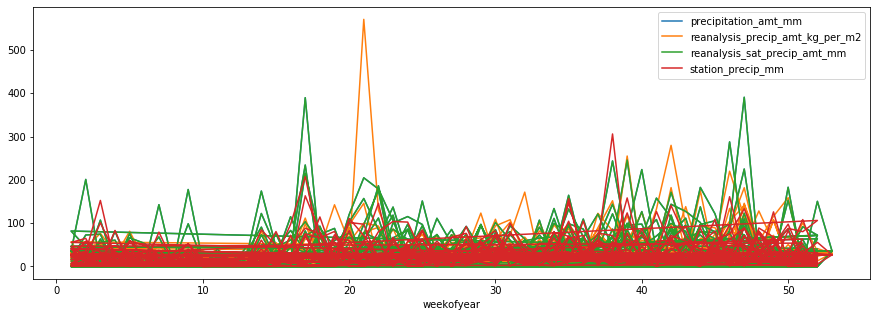

In [79]:
precip_sj = df_sj[["total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]

df_sj.plot(figsize = (15,5),x="weekofyear", y=["precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"])
plt.show()

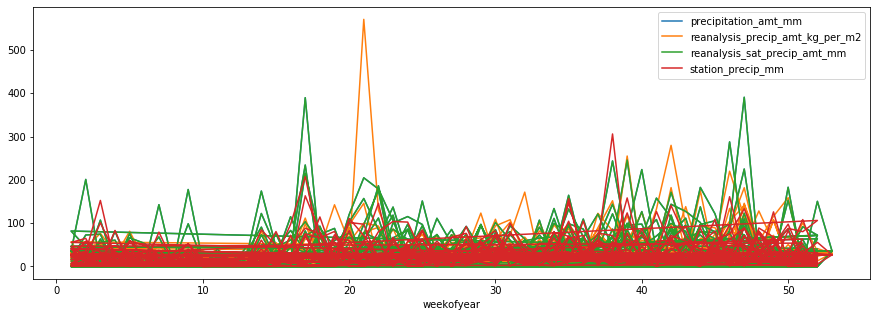

In [80]:
precip_iq = df_iq[["total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]

df_sj.plot(figsize = (15,5),x="weekofyear", y=["precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"])
plt.show()

# 5.(1) Plot total cases and precipiation features based on each month

In [68]:
precip_sj_month = df_sj[["Month","weekofyear","total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]
precip_sj_month.head()

,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
0,4,18,4,12.42,32.00,12.42,16.0
1,5,19,5,22.82,17.94,22.82,8.6
2,5,20,4,34.54,26.10,34.54,41.4
3,5,21,3,15.36,13.90,15.36,4.0
4,5,22,6,7.52,12.20,7.52,5.8


In [69]:
precip_iq_month = df_iq[["Month","weekofyear","total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]
precip_iq_month.head()

,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
936,7,26,0,25.41,43.19,25.41,3.0
937,7,27,0,60.61,46.00,60.61,55.6
938,7,28,0,55.52,64.77,55.52,38.1
939,7,29,0,5.60,23.96,5.60,30.0
940,7,30,0,62.76,31.80,62.76,4.0


In [70]:
precip_sj_month.describe()

,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,6.418803,26.503205,34.180556,35.470809,30.465419,35.470809,26.785484
std,3.452942,15.021909,51.381372,44.390936,35.513556,44.390936,29.231566
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,13.750000,9.000000,0.000000,10.900000,0.000000,6.900000
50%,6.500000,26.500000,19.000000,21.435000,21.405000,21.435000,17.950000
75%,9.000000,39.250000,37.000000,51.662500,36.925000,51.662500,35.300000
max,12.000000,53.000000,461.000000,390.600000,570.500000,390.600000,305.900000


In [71]:
precip_iq_month.describe()

,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,6.417308,26.503846,7.565385,64.245736,57.609864,64.245736,62.467262
std,3.453083,15.029450,10.765478,35.083014,50.092398,35.083014,62.263437
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,13.750000,1.000000,39.147500,24.212500,39.147500,18.000000
50%,6.500000,26.500000,5.000000,60.505000,46.680000,60.505000,47.750000
75%,9.000000,39.250000,9.000000,85.637500,70.432500,85.637500,83.350000
max,12.000000,53.000000,116.000000,210.830000,362.030000,210.830000,543.300000


Text(0.5, 0, 'Month of Year')

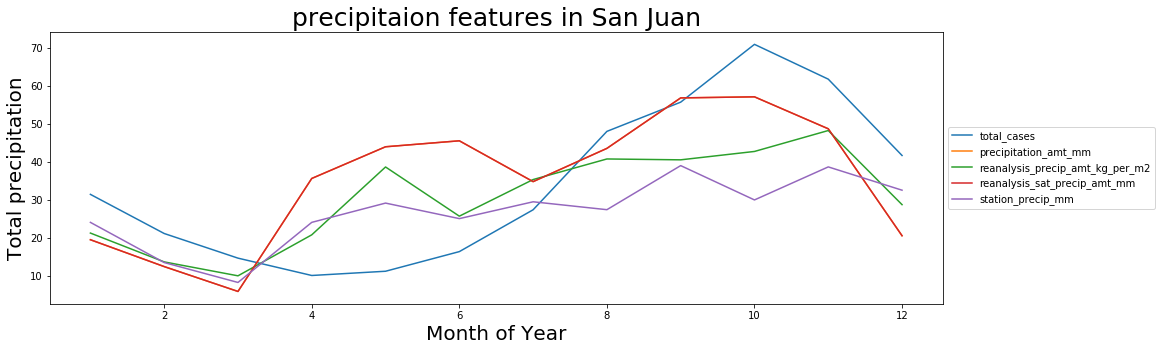

In [82]:
for i in (precip_sj):
    precip_sj_month.groupby("Month")[i].mean()\
    .plot(figsize = (16, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('precipitaion features in San Juan', size = 25)
plt.ylabel('Total precipitation', size = 20)
plt.xlabel('Month of Year', size = 20)

Text(0.5, 0, 'Month of Year')

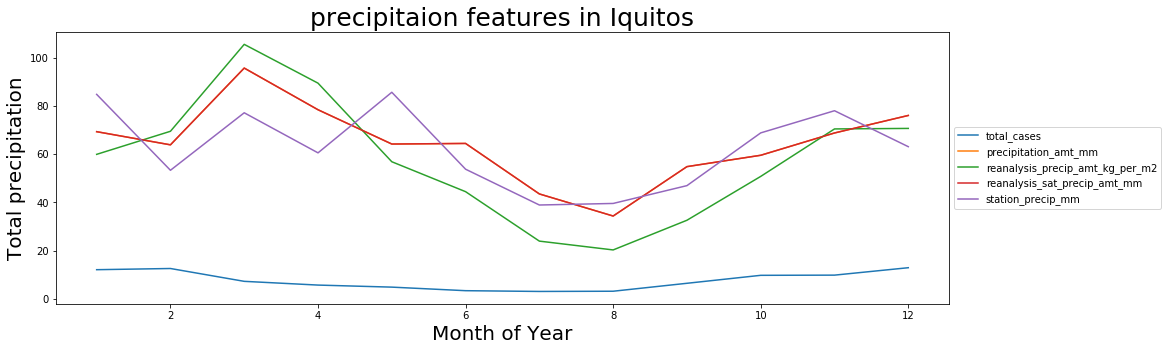

In [83]:
for i in (precip_iq):
    precip_iq_month.groupby("Month")[i].mean()\
    .plot(figsize = (16, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('precipitaion features in Iquitos', size = 25)
plt.ylabel('Total precipitation', size = 20)
plt.xlabel('Month of Year', size = 20)

# 5.(2) Plot total cases and precipiation features based on each year


In [84]:
precip_sj_year = df_sj[["Year","Month","weekofyear","total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]
precip_sj_year.head()

,Year,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
0,1990,4,18,4,12.42,32.00,12.42,16.0
1,1990,5,19,5,22.82,17.94,22.82,8.6
2,1990,5,20,4,34.54,26.10,34.54,41.4
3,1990,5,21,3,15.36,13.90,15.36,4.0
4,1990,5,22,6,7.52,12.20,7.52,5.8


In [85]:
precip_iq_year = df_iq[["Year","Month","weekofyear","total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]
precip_iq_year.head()

,Year,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
936,2000,7,26,0,25.41,43.19,25.41,3.0
937,2000,7,27,0,60.61,46.00,60.61,55.6
938,2000,7,28,0,55.52,64.77,55.52,38.1
939,2000,7,29,0,5.60,23.96,5.60,30.0
940,2000,7,30,0,62.76,31.80,62.76,4.0


In [86]:
precip_sj_year.describe()

,Year,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,1998.826923,6.418803,26.503205,34.180556,35.470809,30.465419,35.470809,26.785484
std,5.212076,3.452942,15.021909,51.381372,44.390936,35.513556,44.390936,29.231566
min,1990.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,3.750000,13.750000,9.000000,0.000000,10.900000,0.000000,6.900000
50%,1999.000000,6.500000,26.500000,19.000000,21.435000,21.405000,21.435000,17.950000
75%,2003.000000,9.000000,39.250000,37.000000,51.662500,36.925000,51.662500,35.300000
max,2008.000000,12.000000,53.000000,461.000000,390.600000,570.500000,390.600000,305.900000


In [87]:
precip_iq_year.describe()

,Year,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,2005.000000,6.417308,26.503846,7.565385,64.245736,57.609864,64.245736,62.467262
std,2.918283,3.453083,15.029450,10.765478,35.083014,50.092398,35.083014,62.263437
min,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.750000,3.750000,13.750000,1.000000,39.147500,24.212500,39.147500,18.000000
50%,2005.000000,6.500000,26.500000,5.000000,60.505000,46.680000,60.505000,47.750000
75%,2007.250000,9.000000,39.250000,9.000000,85.637500,70.432500,85.637500,83.350000
max,2010.000000,12.000000,53.000000,116.000000,210.830000,362.030000,210.830000,543.300000


Text(0.5, 0, 'Year')

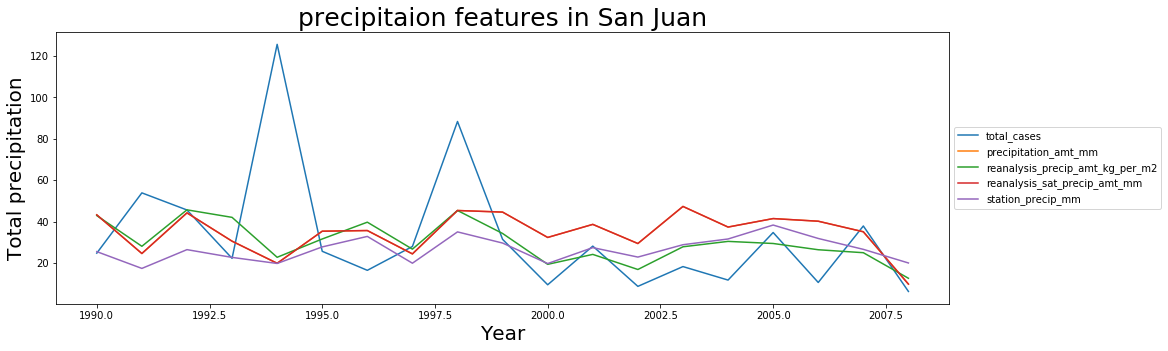

In [89]:
for i in (precip_sj):
    precip_sj_year.groupby("Year")[i].mean()\
    .plot(figsize = (16, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('precipitaion features in San Juan', size = 25)
plt.ylabel('Total precipitation', size = 20)
plt.xlabel('Year', size = 20)

Text(0.5, 0, 'Year')

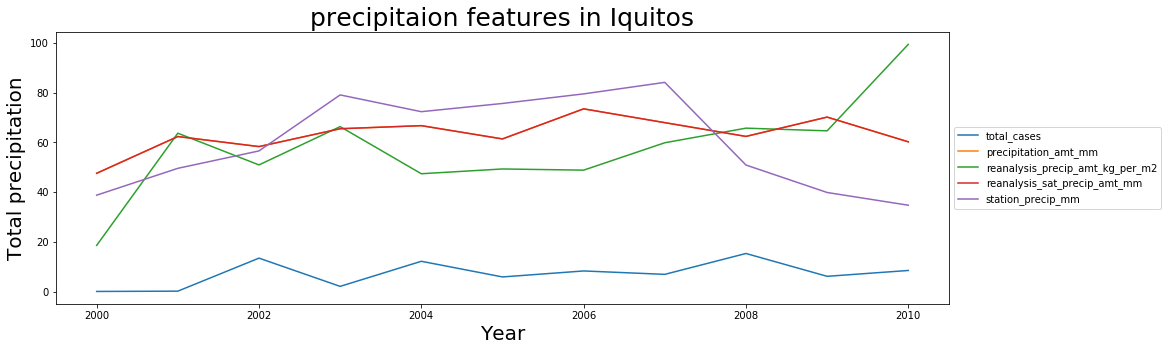

In [91]:
for i in (precip_iq):
    precip_iq_year.groupby("Year")[i].mean()\
    .plot(figsize = (16, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('precipitaion features in Iquitos', size = 25)
plt.ylabel('Total precipitation', size = 20)
plt.xlabel('Year', size = 20)

# 6. Find correation in Precipiation features, Humidity and total cases in two different dataset (San Juan, Iquitos)

## 6.(1) Correlations in San Juan

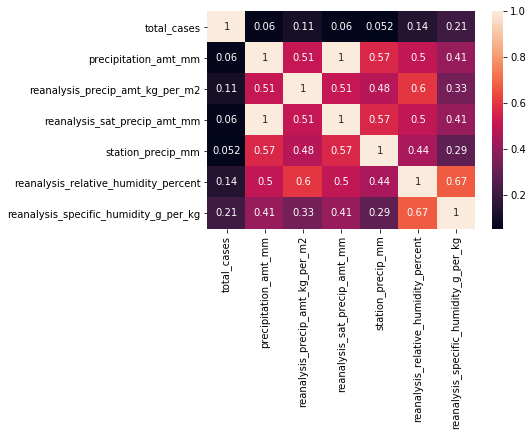

In [95]:
import seaborn as sns
df = pd.DataFrame(df_sj,columns=["total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm","reanalysis_relative_humidity_percent","reanalysis_specific_humidity_g_per_kg"])

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## 6.(2) Correlations in Iquitos

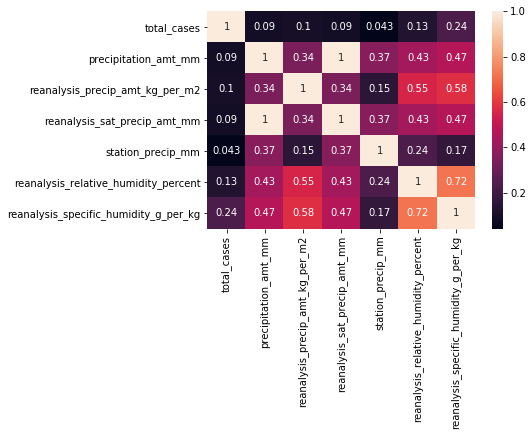

In [98]:
df = pd.DataFrame(df_iq,columns=["total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm","reanalysis_relative_humidity_percent","reanalysis_specific_humidity_g_per_kg"])

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()